This notebook uses DECOTA without mixup with combination of raw mutation and CNV data as input data.

This uses AUROC when validating model during training and saving best model. There are 2 models, 1 trained with cell lines and 1 trained with TCGA. At evaluation, only model trained with TCGA is used. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys

sys.path.append("../../vae_zinb_reprn/")
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from DecotaModel import ModelDECOTAwoMixup

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

## PACLITAXEL

In [7]:
best_parameters = {'predicted_probability_conf': 0.6,
 'predicted_aadrc_conf': 0.11940958488097111,
 'ldr': 0.40052479606659847,
 'batch_size': 64,
 'lr': 0.27888872095434414,
 'weight_decay': 1e-05,
 'momentum': 0.35164213149046014,
 'step_size': 83,
 'loops_train': 500,
 'loops_warm': 80,
 'hd': 4,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [8]:
model_PACLITAXEL = ModelDECOTAwoMixup('PACLITAXEL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.40052479606659847, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.40052479606659847, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
     

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.793478,0.933276


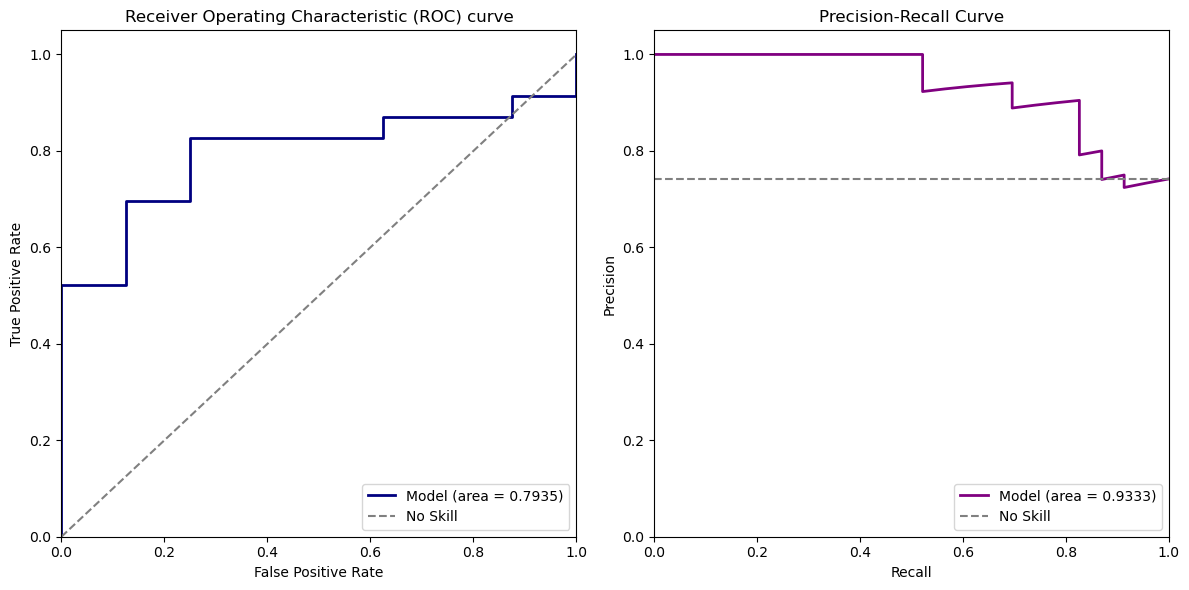

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,35,"{0: 30, 1: 5}",0.440000,0.142418
0,TCGA,82,"{1: 53, 0: 29}",0.994144,0.997080


Distribution of Predictions by Model
[0.00457485 0.44730993 0.89162475 0.98328015 0.99777621]
TP: 19, FP: 3, TN: 5, FN: 4


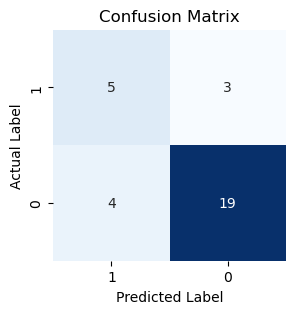

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CISPLATIN

In [12]:
best_parameters = {'predicted_probability_conf': 0.3432694852165878,
 'predicted_aadrc_conf': 0.3325725538469851,
 'ldr': 0.24017835825681688,
 'lr': 0.010866990825161339,
 'weight_decay': 0.034517655726522205,
 'momentum': 0.27786769391968846,
 'step_size': 27,
 'loops_warm': 80,
 'hd': 1,
 'batch_size': 32,
 'loops_train': 300,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [13]:
model_CISPLATIN = ModelDECOTAwoMixup('CISPLATIN', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.24017835825681688, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.24017835825681688, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linea

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,36,"{1: 27, 0: 9}",0.839506,0.948106


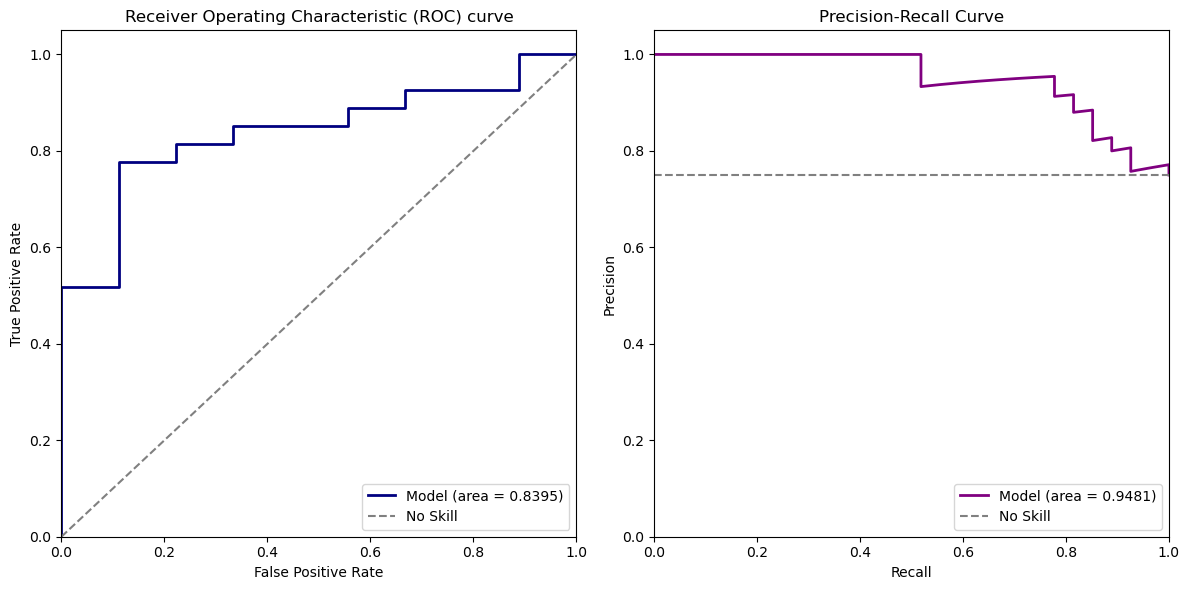

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.639231,0.854577


Distribution of Predictions by Model
[0.73443115 0.74330297 0.7497088  0.75565937 0.76880038]
TP: 27, FP: 9, TN: 0, FN: 0


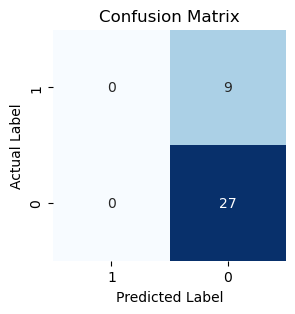

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'predicted_probability_conf': 0.1691017698491559,
 'predicted_aadrc_conf': 0.020081585395945428,
 'ldr': 0.18825372336844776,
 'lr': 0.47968114647069504,
 'weight_decay': 0.04,
 'momentum': 0.18879803708858797,
 'step_size': 68,
 'loops_train': 300,
 'loops_warm': 60,
 'hd': 4,
 'batch_size': 32,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [18]:
model_5_FLUOROURACIL = ModelDECOTAwoMixup('5-FLUOROURACIL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.18825372336844776, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.18825372336844776, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
     

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,21,"{1: 17, 0: 4}",0.897059,0.974023


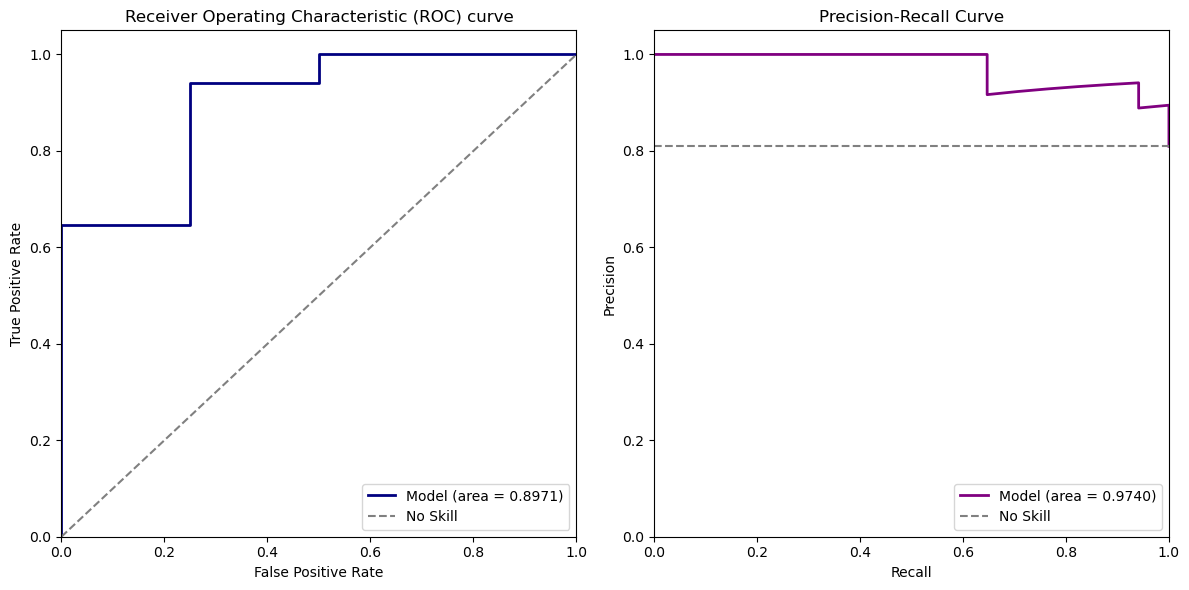

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.920316,0.931067


Distribution of Predictions by Model
[0.01577755 0.03608015 0.04095942 0.06572792 0.09548573]
TP: 0, FP: 0, TN: 4, FN: 17


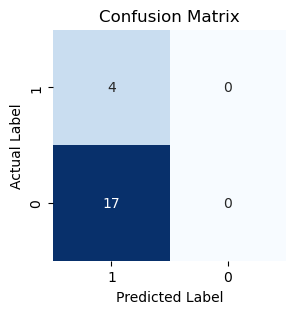

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'predicted_probability_conf': 0.41320217475944415,
 'predicted_aadrc_conf': 0.10010978397968431,
 'ldr': 0.10837793489812368,
 'batch_size': 32,
 'lr': 0.03010924932097395,
 'weight_decay': 0.049745429936051355,
 'momentum': 0.04228298939648362,
 'step_size': 13,
 'loops_train': 600,
 'loops_warm': 100,
 'hd': 1,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelDECOTAwoMixup('CYCLOPHOSPHAMIDE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.10837793489812368, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.10837793489812368, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linea

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,19,"{1: 17, 0: 2}",0.852941,0.983596


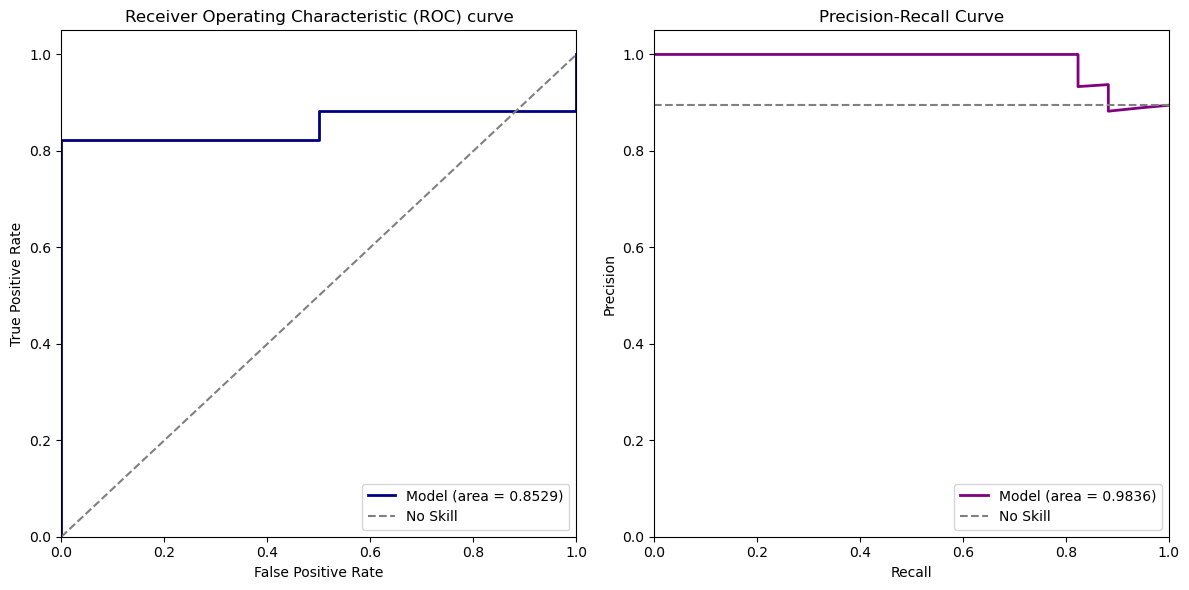

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.992908,0.999557


Distribution of Predictions by Model
[0.90211493 0.90497142 0.90698546 0.90994906 0.9205575 ]
TP: 17, FP: 2, TN: 0, FN: 0


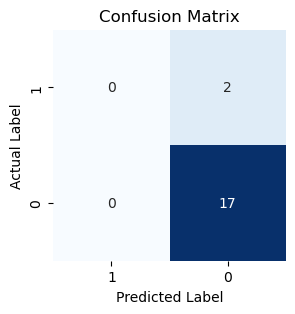

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'predicted_probability_conf': 0.13171950414858596,
 'predicted_aadrc_conf': 0.3397903946657965,
 'ldr': 0.4272066710525861,
 'lr': 0.019143985135372656,
 'weight_decay': 0.04771263629190701,
 'momentum': 0.38217260727312874,
 'step_size': 48,
 'loops_train': 400,
 'loops_warm': 80,
 'hd': 4,
 'batch_size': 32,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [28]:
model_GEMCITABINE = ModelDECOTAwoMixup('GEMCITABINE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4272066710525861, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.4272066710525861, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,18,"{0: 9, 1: 9}",0.592593,0.724815


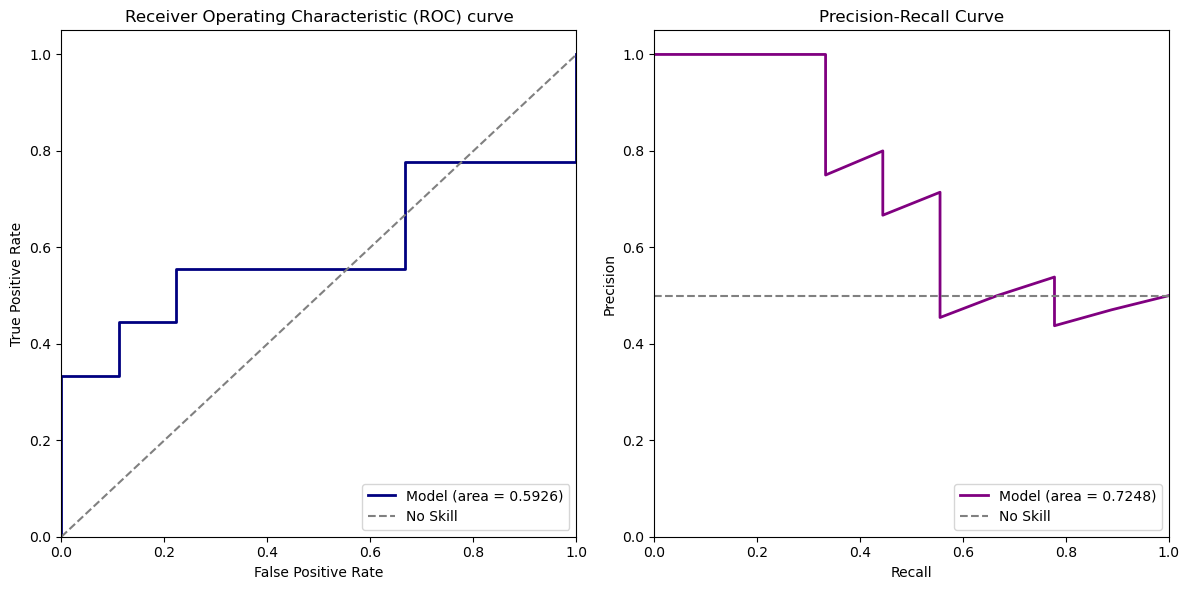

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.995643,0.997306


Distribution of Predictions by Model
[0.55011219 0.56851713 0.57107595 0.58118106 0.58746493]
TP: 9, FP: 9, TN: 0, FN: 0


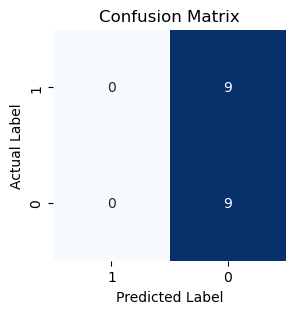

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)